<a href="https://colab.research.google.com/github/HugocamposL3/Linguagem-R/blob/main/k_means_em_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Kmeans Clustering
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
PATH <-"/content/Computers.csv"
df<- read.csv(PATH)
head(df,10)

,X,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,1,1499,25,80,4,14,no,no,yes,94,1
2,2,1795,33,85,2,14,no,no,yes,94,1
3,3,1595,25,170,4,15,no,no,yes,94,1
4,4,1849,25,170,8,14,no,no,no,94,1
5,5,3295,33,340,16,14,no,no,yes,94,1
6,6,3695,66,340,16,14,no,no,yes,94,1
7,7,1720,25,170,4,14,yes,no,yes,94,1
8,8,1995,50,85,2,14,no,no,yes,94,1
9,9,2225,50,210,8,14,no,no,yes,94,1


In [3]:
df <- read.csv(PATH) %>%
  select(-c(X, cd, multi, premium))
glimpse(df)

Rows: 6,259
Columns: 7
$ price  <int> 1499, 1795, 1595, 1849, 3295, 3695, 1720, 1995, 2225, 2575, 219…
$ speed  <int> 25, 33, 25, 25, 33, 66, 25, 50, 50, 50, 33, 66, 50, 25, 50, 50,…
$ hd     <int> 80, 85, 170, 170, 340, 340, 170, 85, 210, 210, 170, 210, 130, 2…
$ ram    <int> 4, 2, 4, 8, 16, 16, 4, 2, 8, 4, 8, 8, 4, 8, 8, 4, 2, 4, 4, 8, 4…
$ screen <int> 14, 14, 15, 14, 14, 14, 14, 14, 14, 15, 15, 14, 14, 14, 14, 14,…
$ ads    <int> 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,…
$ trend  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


In [4]:
summary(df)

     price          speed              hd              ram        
 Min.   : 949   Min.   : 25.00   Min.   :  80.0   Min.   : 2.000  
 1st Qu.:1794   1st Qu.: 33.00   1st Qu.: 214.0   1st Qu.: 4.000  
 Median :2144   Median : 50.00   Median : 340.0   Median : 8.000  
 Mean   :2220   Mean   : 52.01   Mean   : 416.6   Mean   : 8.287  
 3rd Qu.:2595   3rd Qu.: 66.00   3rd Qu.: 528.0   3rd Qu.: 8.000  
 Max.   :5399   Max.   :100.00   Max.   :2100.0   Max.   :32.000  
     screen           ads            trend      
 Min.   :14.00   Min.   : 39.0   Min.   : 1.00  
 1st Qu.:14.00   1st Qu.:162.5   1st Qu.:10.00  
 Median :14.00   Median :246.0   Median :16.00  
 Mean   :14.61   Mean   :221.3   Mean   :15.93  
 3rd Qu.:15.00   3rd Qu.:275.0   3rd Qu.:21.50  
 Max.   :17.00   Max.   :339.0   Max.   :35.00  

In [5]:
#rescale the variables with the scale() function of the dplyr library.

rescale_df <- df %>%
  mutate(price_scal = scale(price),
         hd_scal = scale(hd),
         ram_scal = scale(ram),
         screen_scal = scale(screen),
         ads_scal = scale(ads),
         trend_scal = scale(trend)) %>%
  select(-c(price, speed, hd, ram, screen, ads, trend))

In [6]:
rescale_df

price_scal,hd_scal,ram_scal,screen_scal,ads_scal,trend_scal
"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
-1.24065376,-1.3018902,-0.76129843,-0.6725370,-1.701083,-1.895735
-0.73101535,-1.2825515,-1.11646890,-0.6725370,-1.701083,-1.895735
-1.07536563,-0.9537930,-0.76129843,0.4322948,-1.701083,-1.895735
-0.63804078,-0.9537930,-0.05095751,-0.6725370,-1.701083,-1.895735
1.85161168,-0.2962760,1.36972433,-0.6725370,-1.701083,-1.895735
2.54031223,-0.2962760,1.36972433,-0.6725370,-1.701083,-1.895735
-0.86014671,-0.9537930,-0.76129843,-0.6725370,-1.701083,-1.895735
-0.38666508,-1.2825515,-1.11646890,-0.6725370,-1.701083,-1.895735
0.00933773,-0.7990831,-0.05095751,-0.6725370,-1.701083,-1.895735


In [7]:
#Step 1) Construct a function to compute the total within clusters sum of squares

kmean_withinss <- function(k) {
  cluster <- kmeans(rescale_df, k)
  return (cluster$tot.withinss)
}

In [8]:
#You can test the function with equals 5
kmean_withinss(2)

[1] 27400.21

In [9]:
#Step 2 - Run the algorithm n times
# Set maximum cluster 
max_k <-20 
# Run algorithm over a range of k 
wss <- sapply(2:max_k, kmean_withinss)
elbow <-data.frame(2:max_k, wss)

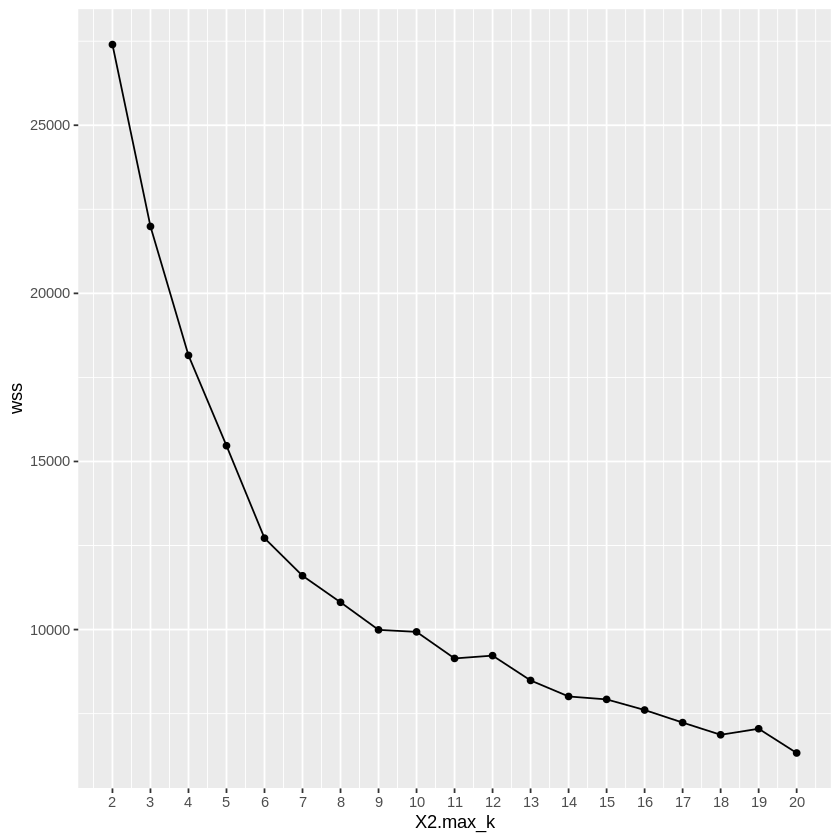

In [10]:
#Plot the graph to visualize where is the elbow point
# Plot the graph with gglop
library(ggplot2)
ggplot(elbow, aes(x = X2.max_k, y = wss)) +
  geom_point() +
  geom_line() +
  scale_x_continuous(breaks = seq(1, 20, by = 1))

In [ ]:
##8 is more optimal value of K from graph

In [11]:
#Examining the cluster
pc_cluster_2 <-kmeans(rescale_df, 10)

In [12]:
pc_cluster_2$cluster

[1]  6  6  6  6  8  8  6  6  6  8  6  8  6  6  8  6  6  6  6  8  6  8  8  1
  [25]  8  6  6  8  8  8  6  6  1  6  6  8  6  8  6  6  8  8  8  6  8  8  6  6
  [49]  6  6  6  6  8  6  6  6  6  1  1  6  8  6  8  6  6  6  6  6  6  8  8  1
  [73]  6  8  8  8  6  8  6  6  8  8  8  8  8  6  6  6  6  8  1  6  8  8  8  6
  [97]  6  6  8  6  6  6  6  8  6  1  8  6  6  6  8  6  8  8  6  1  8  6  6  8
 [121]  6  6  6  8  8  8  1  6  6  6  6  6  6  6  6  6  6  6  8  6  6  8  8  6
 [145]  8  8  6  6  6  8  6  6  8  6  8  8  8  6  1  8  6  6  8  6  8  6  8  6
 [169]  6  6  8  8  6  8  8  8  6  1  6  6  6  1  6  8  8  6  6  8  8  8  6  6
 [193]  6  6  6  6  6  6  6  8  8  1  8  6  6  6  8  8  6  8  6  1  8  6  1  6
 [217]  6  6  8  6  1  8  6  8  8  8  6  8  6  1  6  8  6  6  6  6  6  6  6  8
 [241]  6  6  6  8  8  8  8  8  6  8  6  6  6  6  6  6  1  6  6  8  8  8  8  6
 [265]  6  6  8  8  8  8  6  8  8  8  6  8  6  6  6  6  6  6  6  6  8  8  6  8
 [289]  8  6  8  8  8  8  6  8  6  8  6  6  6  6  6  8  8  6  1  6  8  8  6  8
 [313]  8  8  8  6  6  1  6  6  8  8  8  6  6  6  6  6  8  8  6  6  6  6  6  8
 [337]  6  8  1  1  6  8  8  6  8  6  6  8  8  6  6  8  8  6  6  8  8  8  1  6
 [361]  6  6  6  1  8  6  6  8  6  6  8  8  8  6  6  6  8  8  6  6  6  6  8  6
 [385]  6  6  6  6  6  6  6  8  6  6  8  8  6  6  6  8  8  6  8  8  8  6  6  6
 [409]  8  8  6  6  6  6  1  6  6  6  8  6  8  8  6  8  6  6  8  8  6  6  8  8
 [433]  8  6  6  6  1  6  1  8  1  6  6  6  8  8  6  6  6  8  6  6  8  8  8  8
 [457]  1  6  1  8  8  6  8  8  6  6  8  6  8  8  6  6  8  8  6  6  6  6  8  6
 [481]  8  6  6  6  8  8  8  8  1  8 10  8  6  8  8  6  8  6  6  8  6  6  6  8
 [505]  8  6  8  1  8  8  8  8  8  6  6  1  6  6  6  6  6  8  6  8  6  8  8  6
 [529]  6  8  8  6  8  6  6  8  6  6  8  6  8  8  8  8  8  8  6  8  6  6  8  6
 [553]  8  6  8  6  6  1  8  6  1  6  8  6  6  6  6  6  6  6  6  8  6  6  6  1
 [577]  6  8  8  6  6  8  1  8  1  6  8  6  6  6  6  6  8  6  6  6  8  8  6  6
 [601]  8  8  6  8  6  6  6  6  8  6  8  8  8  6  6 10  8  8  6  6  1  6  8  6
 [625]  6  8  8  6  6  6  6  6  6  6  6  6  8  6  6  8  6  1  6  8  6  1  8  8
 [649]  6  6  6  8  8  8  6  6  1  6  8  6  1  6  8  6  8  8  8  8  6  6  8  8
 [673]  8  8  6  8  1  6  8  6  1  6  8  8  6  8  1  8  6  8  6  8  6  8  6  6
 [697]  8  6  8  6  6  6  6  8  6  6  8  6  6  6  8  8  2 10  2  2 10  1 10  1
 [721] 10  2  4  2  2  2  2 10  4  2  2  2  2  2  2  2  2  2 10 10 10  2  2  2
 [745]  2  1  4  2  2  4  2  1  2 10  1  2  2  1  2  2  2  2  2 10  2  2 10  2
 [769]  2  4  2  2  1 10 10  4  2  2 10 10  2  2 10  4  2  2  2  4  2 10  2 10
 [793]  2  1  2 10 10  2 10  4  4 10  2  1  2  4  2  4  4  2  4  2  2 10  2  2
 [817]  4  2  2  2  4  4  4  4 10  2  2  2  2 10 10  2  2  2  2  2 10  4  2  4
 [841] 10  4 10 10  4  2  2  2  2  2  2  4 10  2 10  4  2  2  2  4  4  2  2  2
 [865] 10  2  2  4  4  4  2  2  2  2  2  4  4  2  2  2  4  1  2  4 10  2  4 10
 [889]  2  2  4 10  2  2  1  2 10 10  2  4 10  4 10  2  4  2  2  2 10  2 10  2
 [913]  2  2  2  2  2  2  2  2  4  2  4  2  2  2  2  2  4  2  2 10  2  2  2  1
 [937]  4  4  2  2  2 10  2  2 10  4  2  4  2  2 10 10  2  2 10  4  2  4  2 10
 [961]  4  2  4  2  4 10  2  2  2  4 10  4  1  2  4  4  2  2  2  2  2 10 10  2
 [985]  4  4  2  2  2  2  2  2  2 10 10  4  4  2  1  2  2  2  4  1  2  2  2  1
[1009]  4  1  2  1  4  2  2  2  4  2  2  2 10  2  4  2  4  4  2  2  2 10  4  2
[1033] 10  4  2  1  2 10 10 10 10  2 10  2  2  2  2 10 10  2 10  4  2  2  2  4
[1057]  2  2  2 10  2  2  2  2  4  2  2  1  2  4  4  2  2  2  2 10  2 10 10  2
[1081]  2 10  2  2  4  4  4  4  4  2 10  2  2  4  4  2 10  2 10  2  2 10  2  2
[1105]  4  2  4  4  4  4  2  2  2  4  2  2 10 10 10  2 10  2 10  2  2 10 10 10
[1129]  2 10  2  2 10  2  4  1  2  2  4  2  4  1  1  4  1 10 10  2  2 10 10  4
[1153]  2 10  1 10  4  2  1  2  4  1 10 10  2 10  2  2  2  4  2 10  4  2  2  1
[1177] 10 10  4  2  2  4  2  1  2  2 10  2  2  2  2  2  4  2  2 10  2  2  4  2
[1201]  2  1  4  1  2  2  1 10  2 10  2  2  2  4  4  

In [13]:
pc_cluster_2$centers

,price_scal,hd_scal,ram_scal,screen_scal,ads_scal,trend_scal
1,0.629907502,-0.01285971,-0.05697735,2.6419582,0.05300192,0.13794765
2,-0.556345985,-0.91739041,-0.80410916,-0.4789448,0.57531557,-0.76534517
3,1.311233721,2.53873548,2.78607483,0.4861890,-0.74369551,1.10852433
4,0.262153025,-0.04265400,-0.15797804,-0.2111359,0.71317106,-0.21194295
5,-0.875766164,0.02240308,-0.35633003,-0.3460803,-0.87707137,1.20319549
6,-0.402089292,-0.92514152,-0.64875091,-0.5204432,-1.28180690,-1.53518528
7,-1.002250526,-0.73717400,-0.78023470,-0.4800175,0.78719093,0.07599361
8,1.119361322,-0.36180587,0.23674329,-0.1815006,-1.26571794,-1.52429243
9,0.008733115,1.65644160,0.81962310,0.4040316,-1.25194124,1.44290199
10,1.246719998,0.52398717,1.17418725,-0.2309479,0.66467288,-0.32886841


In [14]:
pc_cluster_2$size

[1]  531  896  328 1135  863  385  769  279  430  643

In [15]:
result <- cbind(df,pc_cluster_2$cluster)
tail(result)

,price,speed,hd,ram,screen,ads,trend,pc_cluster_2$cluster
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
6254,2154,66,850,16,15,39,35,9
6255,1690,100,528,8,15,39,35,5
6256,2223,66,850,16,15,39,35,9
6257,2654,100,1200,24,15,39,35,3
6258,2195,100,850,16,15,39,35,9
6259,2490,100,850,16,17,39,35,9


In [16]:
write.csv(result,"cluster_result.csv")